In [381]:
import pandas as pd

In [382]:
data = pd.read_csv("SBAnational.csv")
data.head()


/tmp/ipykernel_21632/971220296.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [383]:
data.shape

(899164, 27)

In [384]:
#Etude du type des variables
data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

Analyse de chaque variable

Variable "LoanNr_ChkDgt"

In [385]:
data["LoanNr_ChkDgt"].dtype

dtype('int64')

In [386]:
data["LoanNr_ChkDgt"].head()

0    1000014003
1    1000024006
2    1000034009
3    1000044001
4    1000054004
Name: LoanNr_ChkDgt, dtype: int64

In [387]:
data["LoanNr_ChkDgt"].value_counts()

1000014003    1
5944984007    1
5944874009    1
5944884001    1
5944904005    1
             ..
3072874001    1
3072875008    1
3072885000    1
3072886007    1
9996003010    1
Name: LoanNr_ChkDgt, Length: 899164, dtype: int64

In [388]:
data["LoanNr_ChkDgt"].isnull().sum()
#Il n'y a pas de valeur manquantes

0

In [389]:
data["LoanNr_ChkDgt"].isna().sum()

0

In [390]:
len(data["LoanNr_ChkDgt"].unique())
#C'est la même longueur que notre dataset , on en déduit que c'est une clé primaire , un identifiant unique permettant de classer les prêts.
#On peut donc s'en débarraser ,car elle n'a aucun lien avec le fait de donner un prêt.

899164

Variable Name

In [391]:
data["Name"].dtypes
#C'est donc un objet

dtype('O')

In [392]:
type(data['Name'][0])
#Un observe un échantillon, c'est une chaine de caractère , logique car il semble que cela soit le nom de l'entreprise

str

In [393]:
data["Name"].isnull().sum()
#Il y a 14 valeurs manquantes ,surement dû à des erreurs

14

In [394]:
nb_na_name = data.isnull().sum()
nb_na_name[nb_na_name>0]
data_manquant_name = data[data["Name"].isna()]
data_manquant_name
#Ici , nous avons un probleme , nous n'avons pas les nom des entreprises , et la plupart des ChgOffDate	,un indicateurs de prêt,
#  sont manquantes pour ces noms ,cela peut être dû à l'échec de lancement de l'entreprise , ou à une magouille .
# En tant que tel , pour notre projet , cela est mieux si nous supprimons les entreprises à noms manquants , 
# car potentiellement risqués pour un si petit échantillons, et l'on ne peut pas vraiment remplacer facilement les 
# informations ici , car plusieurs infos sont manquantes.  

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
272,1002095005,NaN,Logan,UT,84321,JPMORGAN CHASE BANK NATL ASSOC,IL,421910,17-Feb-98,1998,...,0,N,NaN,31-Mar-00,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
409,1003125003,NaN,Cobleskill,NY,12043,KEYBANK NATIONAL ASSOCIATION,OH,0,11-Sep-98,1998,...,Y,N,NaN,30-Apr-99,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
465,1003575009,NaN,Tarrytown,NY,10591,KEYBANK NATIONAL ASSOCIATION,OH,541512,23-Feb-99,1999,...,Y,N,NaN,31-May-99,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
466,1003585001,NaN,Mahopac,NY,10541,KEYBANK NATIONAL ASSOCIATION,OH,311920,4-Mar-99,1999,...,N,N,NaN,31-Mar-99,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$12,500.00"
51439,1395235010,NaN,Morton,IL,61550,HEARTLAND BK & TR CO,IL,811219,1-Aug-05,2005,...,N,N,NaN,31-Aug-06,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$75,000.00"
82751,1616875008,NaN,Cleveland,OH,44128,"FIRSTMERIT BANK, N.A.",OH,238350,17-Jan-06,2006,...,T,N,NaN,31-Jul-06,"$22,044.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
103696,1763546010,NaN,LANSDALE,PA,19446,SUSQUEHANNA BANK,PA,423990,14-Apr-06,2006,...,N,N,NaN,28-Feb-07,"$340,000.00",$0.00,P I F,$0.00,"$340,000.00","$306,000.00"
143179,2046175001,NaN,Waterloo,IA,50703,WELLS FARGO BANK NATL ASSOC,SD,442110,28-Sep-06,2006,...,N,N,12-Aug-14,31-Dec-06,"$74,500.00",$0.00,CHGOFF,"$49,935.00","$74,500.00","$63,325.00"
197401,2392194003,NaN,TROY,NY,12180,MANUFACTURERS & TRADERS TR CO,NY,0,16-Oct-98,1999,...,0,Y,NaN,30-Nov-98,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
197428,2392384001,NaN,E. AMHERST,NY,14051,BANK OF AMERICA NATL ASSOC,RI,811310,16-Oct-98,1999,...,0,Y,NaN,28-Feb-99,"$28,000.00",$0.00,P I F,$0.00,"$28,000.00","$22,400.00"


In [395]:
data.dropna(subset=['Name'], axis=0, inplace=True)

In [396]:
data.shape
#On a bien supprimer nos valeurs

(899150, 27)

In [397]:
#Maintenant étudions si il y a des duplicas

data["Name"].duplicated().value_counts()
#Il y a de nombreux duplicas , ce qui peut être un indicateur si il faut accorder un prêt ou pas 
#car en effet ,le prêt a été un succée.
#Il faudra peut être revenir sur la variable "Name" pour affiner le test après une première serie
#de tests.

False    779583
True     119567
Name: Name, dtype: int64

Variable "City"

In [398]:
data["City"].dtypes
#C'est donc un objet

dtype('O')

In [399]:
type(data['City'][0])
#C'est une string contenant la ville dans laquelle l'entrepreneur travaille

str

In [400]:
data["City"].isnull().sum()
#Il y a 30  erreurs manquantes , nous allons regardés ici ce qui ne va pas

30

In [401]:
nb_na_city = data.isnull().sum()
nb_na_city[nb_na_city>0]
data_manquant_city = data[data["City"].isna()]
data_manquant_city
#Comme precedement , de nombreuses informations sont manquantes. Nous allons décider de les supprimer 
#car la quantité est insignifiante comparé aux nombre de données, et les données trop fragmentés.

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
42535,1330603010,BUSATH PHOTOGRAPHY,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,...,N,N,NaN,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,"$190,000.00","$190,000.00"
177891,2268732010,"HAYES/DOCKSIDE,INC",NaN,LA,70130,NEW ORLEANS REGIONAL BUS. DEVE,LA,0,17-Dec-81,1982,...,N,N,NaN,10-Feb-82,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$500,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,...,N,N,NaN,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$150,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",NaN,IL,60636,NaN,NaN,0,15-May-81,1981,...,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,...,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,...,N,N,NaN,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,"$211,000.00","$211,000.00"
270268,2884202008,"SAN DIEGO REFRIGERATD SVCS,INC",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,26-Jun-81,1981,...,N,N,NaN,10-Sep-81,"$407,000.00",$0.00,P I F,$0.00,"$407,000.00","$407,000.00"
270270,2884212000,"EMACO, INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,...,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
270277,2884232006,"MAYER BLUEPRINT,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,29-Jul-81,1981,...,N,N,NaN,10-Sep-81,"$159,000.00",$0.00,P I F,$0.00,"$159,000.00","$159,000.00"
270284,2884252001,TEX-WIPE COMPANY,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,31-Aug-81,1981,...,N,N,NaN,4-Nov-81,"$365,000.00",$0.00,P I F,$0.00,"$365,000.00","$365,000.00"


In [402]:
data.dropna(subset=['City'], axis=0, inplace=True)

In [403]:
data.shape

(899120, 27)

In [404]:

data["City"].duplicated().value_counts()
#Ici , le fait qu'il y ait des doublons est normal , plusieurs entreprises pouvant appartenir à la même ville.

True     866539
False     32581
Name: City, dtype: int64

In [405]:
data["City"].value_counts().count()
#Il y a bien trop de ville potentielles pour considerer transformer 'city' en une variable catégorielle,
#et nous ne pouvons envisager de supprimer tous les doublons.
#Nous puvons considerer que la variable State et City etant fortement correlés, nous pouvons conserver
#uniquement State pour améliorer notre modèle.A noter que si on dispoait d'une base de données sur les villes plus 
#pousser , alors cette opération purrait nuire à l'amélioration du modèle.

32581

Variable "State"

In [406]:
data["State"].dtypes
#C'est donc un objet

dtype('O')

In [407]:
type(data['State'][0])
#C'est une string contenant les initiales du pays dans lequel l'entreprise travaille


str

In [408]:
data["State"].isnull().sum()
#Il y a 14 erreurs manquantes , nous allons regardés ici ce qui ne va pas

14

In [409]:
nb_na_state = data.isnull().sum()
nb_na_state[nb_na_state>0]
data_manquant_state = data[data["State"].isna()]
data_manquant_state
#Ici , encore une fois , le ChgOffDate est manquant pour la plupart des prêts, donc cela est surement dû à des entreprise qui ont déposés le bilan ,
# et ne pouvait être contactés.Au vu du nombre restreints , et du grands nombres de données manquantes liés à ces données ,
# nous allons les supprimer.
#Nous pourrions essayer de recréer le Zip via city et state , mais justement State est manquant dans les cas étuiés

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,...,N,N,5-Mar-90,NaN,$0.00,$0.00,NaN,"$11,364.00","$15,000.00","$15,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,...,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,...,N,N,NaN,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,...,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,...,N,N,NaN,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,"$119,000.00","$119,000.00"
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,...,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,...,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,...,N,N,NaN,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$252,600.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,...,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,...,N,N,NaN,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$212,500.00"


In [410]:
data.dropna(subset=['State'], axis=0, inplace=True)

In [411]:
data.shape
#On a bien supprimer nos valeurs

(899106, 27)

In [412]:
#Maintenant étudions si il y a des duplicas

data["State"].duplicated().value_counts()
#Cela est normale , car il n'y a qu'u nnombre limités de réponses, parmi les 50 étas des états Unis.nous pouvons donc 
# considerer cette variable comme une catégorie.Il y a 51 categories après études , les 50 etats et surement une catégorie autres.

True     899055
False        51
Name: State, dtype: int64

In [413]:
data["State"].value_counts()

CA    130613
TX     70456
NY     57688
FL     41212
PA     35169
OH     32620
IL     29666
MA     25266
MN     24372
NJ     24035
WA     23262
GA     22277
WI     21040
MO     20670
CO     20605
MI     20544
UT     18774
AZ     17631
NC     14293
IN     14132
MD     13269
VA     13264
CT     12229
NH     12109
IA     11995
KS     11464
OR     11051
OK      9950
LA      9575
ID      9498
TN      9403
RI      9028
MT      8749
AL      8362
NV      8024
KY      7722
MS      7686
NE      6385
AR      6341
NM      6033
ME      5944
SC      5597
VT      5454
ND      5244
SD      4431
HI      3610
WV      3287
WY      2839
AK      2405
DE      2220
DC      1613
Name: State, dtype: int64

In [414]:
data["State"].value_counts().count()

51

In [415]:
#Nous allons donc changer cette variable en catégorie 
data['State'] = data['State'].astype('category')
data['State'].dtype

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
                  'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
                  'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
                  'WY'],
, ordered=False)

Variable "zip"

In [416]:
data["Zip"].dtypes
#C'est donc un un nombre , mais ici on pourrait le considérer comme une serie de chiffre , plutôt que comme un nombre

dtype('int64')

In [417]:
type(data['Zip'][0])
#C'est une serie de chiffre contenant le code postale de l'emprunteur


numpy.int64

In [418]:
data["Zip"].value_counts(ascending=False)
#Il n'ya pas d'elements manquant

10001    933
90015    926
93401    806
90010    733
33166    671
        ... 
91647      1
33233      1
95549      1
37644      1
26134      1
Name: Zip, Length: 33610, dtype: int64

In [419]:
#Il est normale que plusieurs entreprise ait le même code postale , mais nous voulons verifier si nous pouvons catégoriser nos données.
data["Zip"].duplicated().value_counts()
#De la même façon que city , on ne peut utiliser Zip comme une variable catégorielle ,nous allons donc considerer conserver State 
#plutôt que ZIp , car elle fortement relié à Zip  lais plus facile à utiliser .
# Nous pourrions faire une étude du code postale.

True     865496
False     33610
Name: Zip, dtype: int64

Variable "Bank"

In [420]:
data["Bank"].dtypes
#C'est un bjet.

dtype('O')

In [421]:
type(data['Bank'][0])
#C'est le nom de la banque dans laquelle l'emprunteur emprunte

str

In [422]:
data["Bank"].isnull().sum()
#Nous avons un grand nombre (1556) d'élements manquants. On ne peut pas en toute conscience
#validés des résultats de dons de prêts si nous ne pouvons vérifier la véracité des informations.
#Nous allons donc supprimer ces variables 

1556

In [423]:
data.dropna(subset=['Bank'], axis=0, inplace=True)

In [424]:
#Etudions les doublons
data["Bank"].duplicated().value_counts()
#Il y a un grand nombre de banques, nous ne pouvons donc pas considérer cela comme une variable catégorielles .
# La variable est trop importante pour être ignoré, nous allons la garder.

True     891749
False      5801
Name: Bank, dtype: int64

In [425]:
data["Bank"].value_counts()
#Nous avons un certains nombre de banques qui n'apparaisse qu'une seule fois , cela peux être des outliers que l'on doit supprimés

BANK OF AMERICA NATL ASSOC        86851
WELLS FARGO BANK NATL ASSOC       63500
JPMORGAN CHASE BANK NATL ASSOC    48166
U.S. BANK NATIONAL ASSOCIATION    35143
CITIZENS BANK NATL ASSOC          35054
                                  ...  
5 STAR BANK                           1
LIVERPOOL COMMUNITY BANK              1
BUCKEYE STATE CU INC                  1
WATERFORD BANK NATL ASSOC             1
DEPCO                                 1
Name: Bank, Length: 5801, dtype: int64

In [426]:
data.shape

(897550, 27)

In [427]:
occurrence_counts_bank = data["Bank"].value_counts()
to_drop = occurrence_counts_bank[occurrence_counts_bank < 5].index
data.drop(data[data["Bank"].isin(to_drop)].index, inplace=True)

In [428]:
data.shape
#Nous avons supprimé avec succés des outliers , et nous pouvons modifier le nombre facilement pour améliorer notre système a cas où

(893366, 27)

Variable "BankState"

In [429]:
data["BankState"].dtypes
#C'est un objet

dtype('O')

In [430]:
type(data['BankState'][0])
#C'est l'etat dans laquelle la banque se trouve. 

str

In [431]:
data["BankState"].isnull().sum()
#il ya 0 elements manquants

0

In [432]:
data.dropna(subset=['BankState'], axis=0, inplace=True)

In [433]:
#Etudions les doublons
data["BankState"].duplicated().value_counts()
#Peux ton considerer la variable come catégorielle ?

True     893313
False        53
Name: BankState, dtype: int64

In [434]:
#Etudions les doublons
data["BankState"].value_counts()


CA    117920
NC     79459
IL     65575
OH     58347
SD     51060
TX     47396
RI     45349
NY     39460
VA     28944
DE     24519
MN     19744
UT     18956
PA     16952
WI     15266
MO     14640
MA     13804
FL     13711
GA     13676
AL     12050
OR     11349
WA     10642
CO     10509
CT      9898
IA      9755
NJ      9385
KS      8698
MT      7819
IN      7535
SC      7424
MI      7306
OK      7206
MD      6973
NH      6784
AR      6245
MS      5894
TN      5506
NE      5221
ND      5075
LA      4977
VT      4751
NM      4399
NV      4312
ID      4300
KY      4265
DC      3998
AZ      3941
ME      3687
HI      2984
WY      2150
WV      1968
AK      1430
PR       151
GU         1
Name: BankState, dtype: int64

In [435]:
occurrence_counts = data["BankState"].value_counts()
occurrence_counts[occurrence_counts >= 1500].index.shape
#Ici nous pouvons essayé de faire correspondre the bank state et state , si on veut que  notre modèle soit plus orienté 
# pour des prêts locaux , nous allons donc tester pour essayer de supprimer des outliers, qui semble être les 3 dernier

(50,)

In [436]:
occurrence_counts = data["BankState"].value_counts()
to_drop = occurrence_counts[occurrence_counts  <= 1500].index
data.drop(data[data["BankState"].isin(to_drop)].index, inplace=True)

In [437]:
data.shape

(891784, 27)

Variable "NAICS"

In [438]:
data["NAICS"].dtypes
#C'est un entier , mais le NAICS représente un code qui le secteur d'activité.C'est extrement important .

dtype('int64')

In [439]:
data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [440]:
#Ici il faut vérifier les element nuls et non manquants , car un NAICS manquants est remplacés par 0
data["NAICS"].value_counts()
#il ya 198787 elements manquants , nous ne pouvons supprimer sans réflechir , nous devons essayer de récuperer de l'informations.

0         198787
722110     27812
722211     19349
811111     14498
621210     13938
           ...  
925120         1
312210         1
112420         1
524192         1
111160         1
Name: NAICS, Length: 1312, dtype: int64

In [441]:
#Une des raisons des erreurs peut être dû à l'introduction du systèmes NAICS , et des entreprises ne l'ont pas mis car il n'existait pas encore.
#Pour essayer de récuperer de l'information , nous avons décider de donner de le dernier NAICS des entreprise  selon leur noms.


In [442]:
data_duplicates = data[data.duplicated(['Name'],keep='first')]
data_duplicates=data_duplicates[data_duplicates['NAICS']!=0]
data_duplicates

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
312,1002375006,"Emerling Fire Equipment, Inc.",West Seneca,NY,14224,KEYBANK NATIONAL ASSOCIATION,OH,421990,10-Apr-98,1998,...,0,N,NaN,30-Jun-98,"$15,000.00",$0.00,P I F,$0.00,"$15,000.00","$7,500.00"
360,1002725004,Earth Bound,South China,ME,4358,KEYBANK NATIONAL ASSOCIATION,OH,448120,1-Jun-98,1998,...,Y,N,NaN,31-May-01,"$35,000.00",$0.00,P I F,$0.00,"$20,000.00","$10,000.00"
370,1002805004,Action Bookkeeping & Tax Servi,Buffalo,NY,14211,KEYBANK NATIONAL ASSOCIATION,OH,541213,15-Jun-98,1998,...,N,N,NaN,30-Jun-98,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
390,1002945000,"First Fuel & Heating, Inc.",Hudson,NY,12534,KEYBANK NATIONAL ASSOCIATION,OH,454311,30-Jun-98,1998,...,N,N,NaN,31-Aug-98,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$30,000.00"
427,1003256003,DIMENSIONS,OCEAN CITY,MD,21842,"PNC BANK, NATIONAL ASSOCIATION",DE,451110,7-Feb-06,2006,...,T,N,25-Jun-08,28-Feb-06,"$20,000.00",$0.00,CHGOFF,"$20,000.00","$20,000.00","$10,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899098,9994463004,ROSENBERG & ASSOCIATES,LOS ANGELES,CA,90045,U.S. BANK NATIONAL ASSOCIATION,CA,541330,27-Feb-97,1997,...,0,N,NaN,31-Mar-97,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00"
899101,9994503003,"WARPED & REAL PROUD, INC.",SEATTLE,WA,98109,BANK OF AMERICA NATL ASSOC,WA,314912,27-Feb-97,1997,...,Y,N,NaN,31-Dec-97,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$37,500.00"
899112,9994693003,COAST TO COAST HARDWARE,MT. JULIET,TN,37122,BANK OF AMERICA NATL ASSOC,TN,444130,27-Feb-97,1997,...,N,N,NaN,31-Jul-99,"$110,000.00",$0.00,P I F,$0.00,"$110,000.00","$82,500.00"
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,27-Feb-97,1997,...,N,N,NaN,31-Mar-97,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$150,000.00"


In [443]:
mon_dictionnaire = {}
for index, row in data_duplicates.iterrows():
    mon_dictionnaire[row['Name']] = row['NAICS']
mon_dictionnaire
#Nous avons récuperer nos doublons selon leur noms et leur dernier NAICS dans un dictionnaire

{'Emerling Fire Equipment, Inc.': 421990,
 'Earth Bound': 448120,
 'Action Bookkeeping & Tax Servi': 541213,
 'First Fuel & Heating, Inc.': 454311,
 'DIMENSIONS': 451110,
 'MERCURY VENTURES LIMITED COMPA': 448310,
 'SERRAHOST INC': 518210,
 'ARC Radar & Communication Serv': 541330,
 'TECHNICOM AUDIO & VISUAL, INC.': 512110,
 'ABQ PAVING': 234110,
 'Kennebec Cafe, Inc.': 722110,
 'VERIPOINT, INC': 541618,
 'Amboy Monument & Lettering Ser': 454390,
 'Rhode Island Fencing Academy &': 611620,
 'Amherst Books, Inc.': 451211,
 'Straight Shot Express': 492110,
 'P.C. Solutions & Training, Inc': 611519,
 'Dennis A. Burke, D.O.': 621111,
 'Boston Pedorthic Associates, L': 621391,
 'Parlee Cycles Inc': 336991,
 'New England Spine & Holistic H': 621310,
 'Hoffman and Associates Dental': 339116,
 'Boston Street House of Pizza': 722211,
 'F.W.Gorham Landscaping': 561730,
 'Sharon Aircraft Components': 336412,
 'Interamerica Distributors, LLC': 424410,
 'JC Housewright': 236115,
 'Houston Enterprise

In [444]:

#Nous remplacons leur NAICS dans notre systeme de données.
data["NAICS"]= data.apply(lambda row: mon_dictionnaire[row["Name"]] if row["Name"] in mon_dictionnaire else row["NAICS"], axis=1)


In [445]:
#Nous vérifions les élements manquants
data["NAICS"].value_counts()
# Nous avons recuperer 198787-180236 soit 18551 élements.
#En tant que tel , nous devrions récuperer les données pour compléter le NAICS , mais nous ne voyons pas comment
# compléter les données sans informations , donc nous devons les supprimer.
#Au vue des données supprimer précedemments , je ne souhaite pas impacter plus le NAICS , mais on pourrait et peut
#être devrait supprimer les élements avec peu d'apparition .A revoir plus tard si nécessaire

0         180236
722110     28616
722211     23274
811111     15034
621210     13937
           ...  
325192         1
514190         1
327120         1
313310         1
111160         1
Name: NAICS, Length: 1311, dtype: int64

In [446]:
data.drop(data[data["NAICS"] == 0].index, inplace=True)

In [447]:
data["NAICS"].value_counts()

722110    28616
722211    23274
811111    15034
621210    13937
624410    10357
          ...  
331411        1
333241        1
212325        1
313310        1
111160        1
Name: NAICS, Length: 1310, dtype: int64

Variable " ApprovalDate"

In [448]:
data["ApprovalDate"].dtypes
#C'est un objet avec la date de l'approuvement du prêt

dtype('O')

In [449]:
#On transforme nos données en date
from datetime import date
data['ApprovalDate'] = data['ApprovalDate'].astype(str)
data['ApprovalDate'] = pd.to_datetime(data['ApprovalDate'])


In [450]:
data["ApprovalDate"].value_counts(ascending=False)
#Il n'ya pas de valeurs manquantes.
#Il est inutile de vérifier les doublons , car il n'est pas anormal d'avoir plusieurs prêts le même jour
#La variable ne semble pas pertinente pour evaluer un prêt.On peut l'enlever pour la prédiction , mais elle reste
#importante pour différentes opérations ( ex legislation)

2004-01-30    1032
2004-10-04     658
2003-09-30     606
2005-06-30     570
2005-04-18     532
              ... 
1985-03-20       1
1985-03-15       1
2009-11-08       1
1985-03-12       1
2014-05-28       1
Name: ApprovalDate, Length: 7682, dtype: int64

Variable "ApprovalFY"

In [451]:
data["ApprovalFY"].dtypes
#C'est un objet representant l'année fiscale le prêt est reconnu

dtype('O')

In [452]:
type(data["ApprovalDate"][0])
#Il est considéré comme une date , et peut être retiré de manière sereine , car bien 
# pouvant être impactante pour décider du contexte économique , en l'absence de données étoffant cela,
#on peut l'ignorer

pandas._libs.tslibs.timestamps.Timestamp

In [453]:
data["ApprovalFY"].value_counts(ascending=False)
#Il n' a pas de valeurs manquante ni nulles , mais on peut noter que plus on va dans le passé, moins on à de donnés.
# Il pourrait être intéressant de supprimer des outliers pour améliorer le modèle en le concentrant sur 
# une periode données plus récentes.

2006    75892
2007    71723
2003    57958
2005    52798
2002    44193
2004    44172
2008    39402
2001    37107
2005    24520
1999    23974
2004    23892
2000    23049
1995    21574
2009    18974
1997    18522
1998    18135
1996    17097
2010    16627
2011    12449
1993    11210
1992    10277
1994     9136
1991     7588
1990     6992
1989     6214
2012     5893
1994     5822
2013     2417
1996     1726
1988      857
1987      746
2014      261
1986      107
1985       98
1984       66
1983       40
1982       16
1981        9
1980        5
1979        4
1978        4
1972        1
1978        1
Name: ApprovalFY, dtype: int64

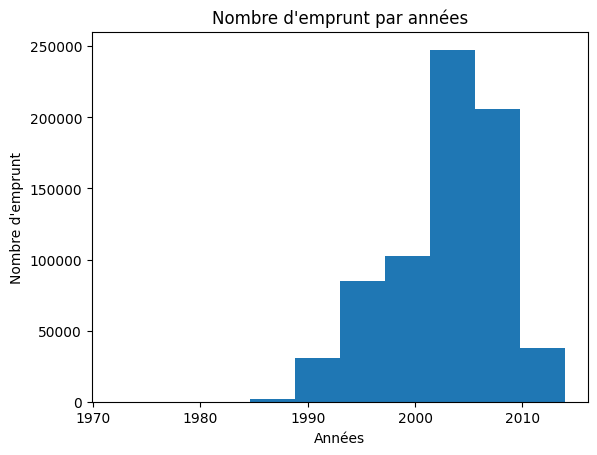

In [454]:
import matplotlib.pyplot as plt


# Sélectionnez la colonne souhaitée
column = data["ApprovalFY"].astype(int)

# Créez un histogramme
plt.hist(column)

# Ajoutez un titre et des étiquettes d'axe
plt.title("Nombre d'emprunt par années")
plt.xlabel("Années")
plt.ylabel("Nombre d'emprunt")

# Affichez le résultat
plt.show()

Variable "Term" 

In [455]:
data["Term"].dtype
#C'est un entier qui correspond au nombre de mois proposé par l'entreprise pour remboursé

dtype('int64')

In [456]:
data["Term"].value_counts(ascending=False)
#Il n' y a pas de valeur manquantes.

84     197337
60      67911
240     57587
120     56883
300     29381
        ...  
374         1
354         1
353         1
527         1
391         1
Name: Term, Length: 381, dtype: int64

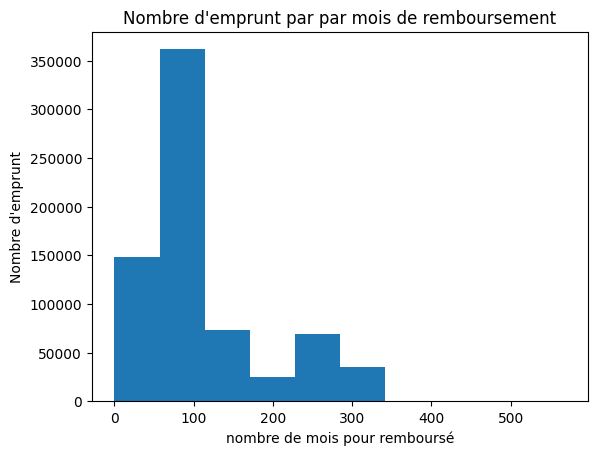

In [457]:
# Sélectionnez la colonne souhaitée
column = data["Term"].astype(int)

# Créez un histogramme
plt.hist(column)

# Ajoutez un titre et des étiquettes d'axe
plt.title("Nombre d'emprunt par par mois de remboursement")
plt.xlabel("nombre de mois pour remboursé")
plt.ylabel("Nombre d'emprunt")

# Affichez le résultat
plt.show()

In [458]:

#On a certes beaucoup de valeurs mais on note de très nombreux valeurs extrêmes.On peut affiner notre modèle en travaillant 
# sur le nombre de mois nécessaire pour autorisé le prêt , notamment en retirant les valeurs extremes (391 mois par exemple), 
# et en limitant les choix d'emprunt autour de 84 mois .Mais ce n'est pas nécessaire donc on va éviter.


Varialbe "NoEmp"

In [459]:
data["NoEmp"].dtype
#C'est un entier représentants le nombre d'employés.

dtype('int64')

In [460]:
data["NoEmp"].value_counts()
#Il n'y a pas de valeurs manquantes , et des doublons sont normales.
#Mais on remarque de très petits entreprise de 1 ou 2 employés.Notre cible ici est 
#clairement des petites entreprises.Une reflexion pour transformer notre variable en catégorielle , et mettre une catégorie plus
# pour les grands nombres peut être envisageables.

1       132972
2       116848
3        74432
4        59085
5        48363
         ...  
5555         1
345          1
604          1
605          1
273          1
Name: NoEmp, Length: 506, dtype: int64

Variable "NewExist"

In [461]:
data["NewExist"].dtype
#C'est une variable qui précise si une entrprise est nouvelle ou non , ancienne =1 , nouvelle =2 .
#Il est étrange d'avoir un float ici , nous allons verfifier les valeurs.

dtype('float64')

In [462]:
data["NewExist"].value_counts()
#Ici , nous avons 733 valeurs manquantes , probablement ce qui a amené à la transformation en float
#Au vu de du nombre d'entreprise "ancienne" , la banque à une bonne fidélité ce qui implique un bonne oeil et
# donc des choix logiques lors de la décision d'accord d'emprunt .Cela implique que NewExist peut être une bonne 
# variable pour determiner si on accorde le prêt . 

1.0    511097
2.0    199583
0.0       733
Name: NewExist, dtype: int64

In [463]:
data["NewExist"].isna().sum()
#Il y a des valeurs manquantes.On peut en déduire que 0 et na sont 2 indicateurs d'une valeurs manquantes .Nous allons les supprimer.


135

In [464]:
data.dropna(subset=['NewExist'], axis=0, inplace=True)

In [465]:
data["NewExist"].astype(int)
data["NewExist"].isnull().sum()

0

In [466]:
data["NewExist"].value_counts()

1.0    511097
2.0    199583
0.0       733
Name: NewExist, dtype: int64

In [467]:
data.drop(data[data["NewExist"] == 0].index, inplace=True)

In [468]:
data["NewExist"].value_counts()
#Nos valeurs manquantes sont effaces , et nous avons un variable binaires importantes propres pour notre modèles.

1.0    511097
2.0    199583
Name: NewExist, dtype: int64

Variable "CreateJob"

In [469]:
data["CreateJob"].dtype
#C'est un entier qui nous renvoie le nombre de job crée par l'emprunt

dtype('int64')

In [470]:
data["CreateJob"].value_counts()
#Ici il peut être normale d'avoir des 0 , ce ne sont pas des valeurs manquantes

0       466812
1        61189
2        55159
3        26703
4        18611
         ...  
1150         1
1618         1
409          1
131          1
1016         1
Name: CreateJob, Length: 220, dtype: int64

In [471]:
data["CreateJob"].isna().sum()
#il n' ya pas de valeurs manquantes dans notre variable.
#Notre varialbe n'a pas de valeurs manquantes , ni de "doublons".
#Cet variable n'est pas si nécessaire pour determiner si notre prêt doit etre accepter ou non, nous ouvons l'ignorer.


0

Variable "RetainedJob"

In [472]:
data["RetainedJob"].dtype
#C'est un entier qui représente le nombre de métier

dtype('int64')

In [473]:
data["RetainedJob"].value_counts()
#Pareil que pour  CreatedJob , il n'y a pas de valeurs étranges

0       275416
1        86548
2        74575
3        48214
4        38095
         ...  
236          1
216          1
366          1
1300         1
198          1
Name: RetainedJob, Length: 326, dtype: int64

In [474]:
data["CreateJob"].isna().sum()
#il n' ya pas de valeurs manquantes dans notre variable.
#Notre varialbe n'a pas de valeurs manquantes , ni de "doublons".
#Nous devons cependant nous questionner sur un point : Si les emplois sont conservés après l'emploi ,
#cela induit que le prêt à été accordé, et donc ne peut pas être pris dans notre modèle dû au data leaking.

0

Variable "FranchiseCode"

In [475]:
data["FranchiseCode"].dtype
#C'est un code qui certifie si l'entreprise est dans une franchise ou non
#0 pour oui et 1 pour non, c'est donc une variable qui est supossément catégorielle binaire

dtype('int64')

In [476]:
data["FranchiseCode"].value_counts()
#Nous avons des valeurs "étranges" qui sont probablement une erreur lié au NAICS

1        478769
0        190114
78760      2761
68020      1866
50564       881
          ...  
71440         1
48610         1
14800         1
74803         1
18701         1
Name: FranchiseCode, Length: 2345, dtype: int64

In [477]:
data_franchise_ou_non_erreur = data[(data['FranchiseCode'] != 0) & (data['FranchiseCode'] != 1)]
data_franchise_ou_non_erreur.shape
#Nous allons avoir un set plus propre , au cas où le
#le fait d'être une variable catégorielle binaire ou non influe trop sur notre modèle

(41797, 27)

In [478]:
data_franchise_ou_non_erreur["FranchiseCode"].value_counts()

78760    2761
68020    1866
50564     881
25650     593
17998     592
         ... 
40760       1
10731       1
57100       1
86560       1
18701       1
Name: FranchiseCode, Length: 2343, dtype: int64

In [479]:
data.shape

(710680, 27)

In [480]:
condition = (~data.isin(data_franchise_ou_non_erreur)).all(axis=1)

# Sélectionner les lignes à conserver en utilisant les conditions "erreur franchise"
data = data[condition]

data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,422450,1997-02-28,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,9995473009,"FABRICATORS STEEL, INC.",BALTIMORE,MD,21224,BANK OF AMERICA NATL ASSOC,MD,332431,1997-02-27,1997,...,0,N,NaN,30-Jun-97,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,1997-02-27,1997,...,N,N,NaN,31-Mar-97,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$150,000.00"
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"


In [481]:
data.shape

(668883, 27)

In [482]:
data["FranchiseCode"].value_counts()

1    478769
0    190114
Name: FranchiseCode, dtype: int64

In [483]:
data["FranchiseCode"].isnull().sum()
#Il n'y a pas d'élements manquants,

0

Variable "UrbanRural"

In [484]:
data["UrbanRural"].dtype
#C'est une variable entière catégorielle, qui renvoie
# 1 = Urban, 2 = rural, 0 = undefined

dtype('int64')

In [485]:
data["UrbanRural"].value_counts()
#Il n'ya pas ici d'anomalie, verifions les valeurs manquantes.

1    427440
0    146239
2     95204
Name: UrbanRural, dtype: int64

In [486]:
data["UrbanRural"].isnull().sum()
#Il n'y a pas de valeurs manquantes
#Les données de cette variables sont propres , mais elles ne semblent pas impactantes , nous allons peut être enlever cette varialbe.

0

Variable "RevLineCr"

In [487]:
data["RevLineCr"].dtype
#C'est un objet
#Il ne devrait il n'y avoir que deux résultat Revolving line of credit: Y = Yes, N = No
#C'est donc une variable catégorielle binaire

dtype('O')

In [488]:
data["RevLineCr"].value_counts()
#Nous avons un grand nombre de valeur manquantes ( Au moins 219142).

N    262947
0    196461
Y    192632
T     14514
1        16
R        14
2         5
`         4
,         1
A         1
-         1
Q         1
C         1
Name: RevLineCr, dtype: int64

In [493]:
data_revline_ou_non_erreur = data[(data['RevLineCr'] != "Y") & (data['RevLineCr'] != "N")&(data['RevLineCr'] != "0")] 

In [ ]:
data_revline_ou_non_erreur.shape

In [494]:
data_revline_ou_non_erreur["RevLineCr"].value_counts()

T    14514
1       16
R       14
2        5
`        4
,        1
A        1
-        1
Q        1
C        1
Name: RevLineCr, dtype: int64

In [496]:
condition_revliner = (~data.isin(data_revline_ou_non_erreur)).all(axis=1)

# Sélectionner les lignes à conserver en utilisant les conditions "erreur revliner"
data = data[condition_revliner]

data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,422450,1997-02-28,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899156,9995473009,"FABRICATORS STEEL, INC.",BALTIMORE,MD,21224,BANK OF AMERICA NATL ASSOC,MD,332431,1997-02-27,1997,...,0,N,NaN,30-Jun-97,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,1997-02-27,1997,...,N,N,NaN,31-Mar-97,"$200,000.00",$0.00,P I F,$0.00,"$200,000.00","$150,000.00"
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"


In [497]:
data["RevLineCr"].value_counts()
#Nous allons garder les 3 variables , et transformer la variable en catégorielle.

N    262947
0    196461
Y    192632
Name: RevLineCr, dtype: int64

In [499]:
data["RevLineCr"].astype("category")

0         N
1         N
2         N
4         N
5         N
         ..
899156    0
899157    N
899159    0
899160    Y
899161    N
Name: RevLineCr, Length: 652040, dtype: category
Categories (3, object): ['0', 'N', 'Y']